<a href="https://colab.research.google.com/github/amrrmadhn/bmlp-dicoding/blob/master/Clustering/%5BClustering%5D%20Submission%20Akhir%20BMLP_Ammar%20Ramadhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,TX001046,AC00474,230.08,2023-05-01 16:23:40,Debit,Austin,D000045,93.52.44.101,M006,Online,79.0,Retired,124.0,1.0,4466.10,2024-11-04 08:11:47
2533,TX001484,AC00198,561.58,2023-06-23 17:38:26,Debit,Sacramento,D000229,170.154.69.105,M022,Online,65.0,Doctor,23.0,1.0,11748.86,2024-11-04 08:06:32
2534,TX000200,AC00358,493.11,2023-07-31 16:25:26,Debit,Colorado Springs,D000232,35.220.238.127,M022,Branch,53.0,Retired,236.0,1.0,7432.99,2024-11-04 08:08:01
2535,TX000592,AC00057,198.62,2023-05-15 16:19:14,Credit,Tucson,D000378,97.4.209.133,M079,Branch,27.0,Student,84.0,1.0,1196.07,2024-11-04 08:06:38


In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

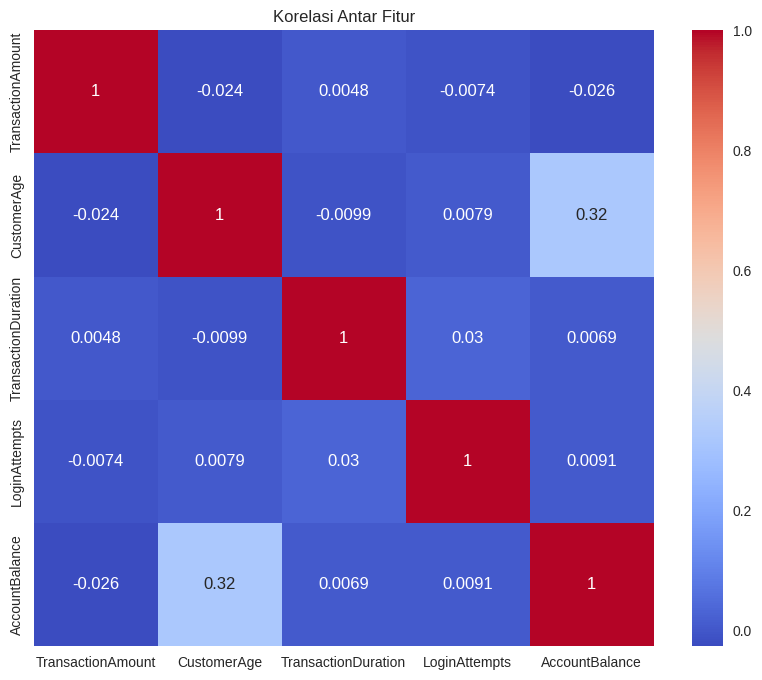

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

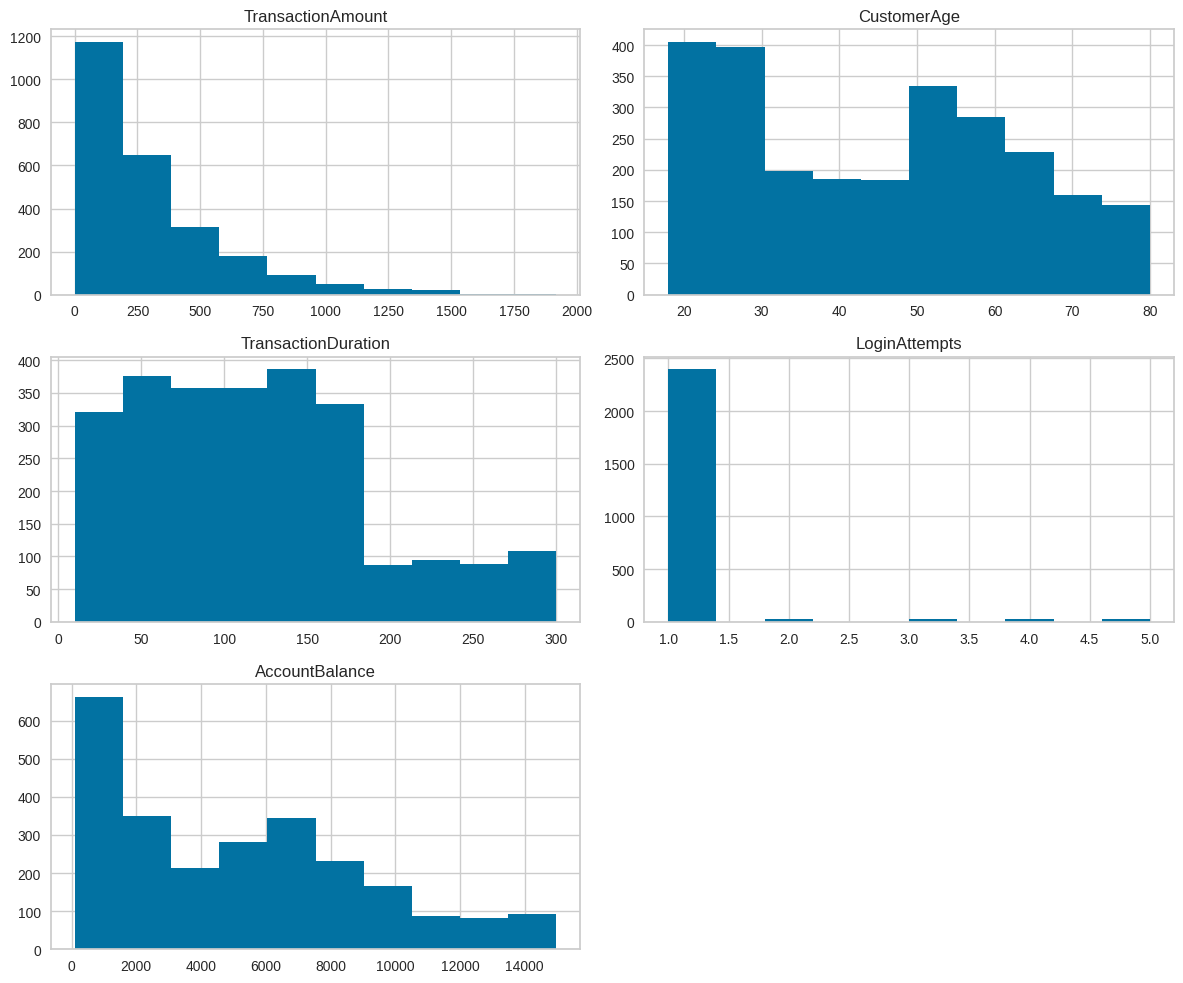

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [8]:
# Menghitung jumlah dan persentase missing values di setiap kolom
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

missing_data[missing_data['Missing Values'] > 0]  # Menampilkan kolom dengan missing values

,Missing Values,Percentage
Location,30,1.182499
DeviceID,30,1.182499
TransactionType,30,1.182499
TransactionID,29,1.143082
TransactionDate,28,1.103666
Channel,27,1.064249
AccountBalance,27,1.064249
TransactionAmount,26,1.024832
TransactionDuration,26,1.024832
PreviousTransactionDate,24,0.945999


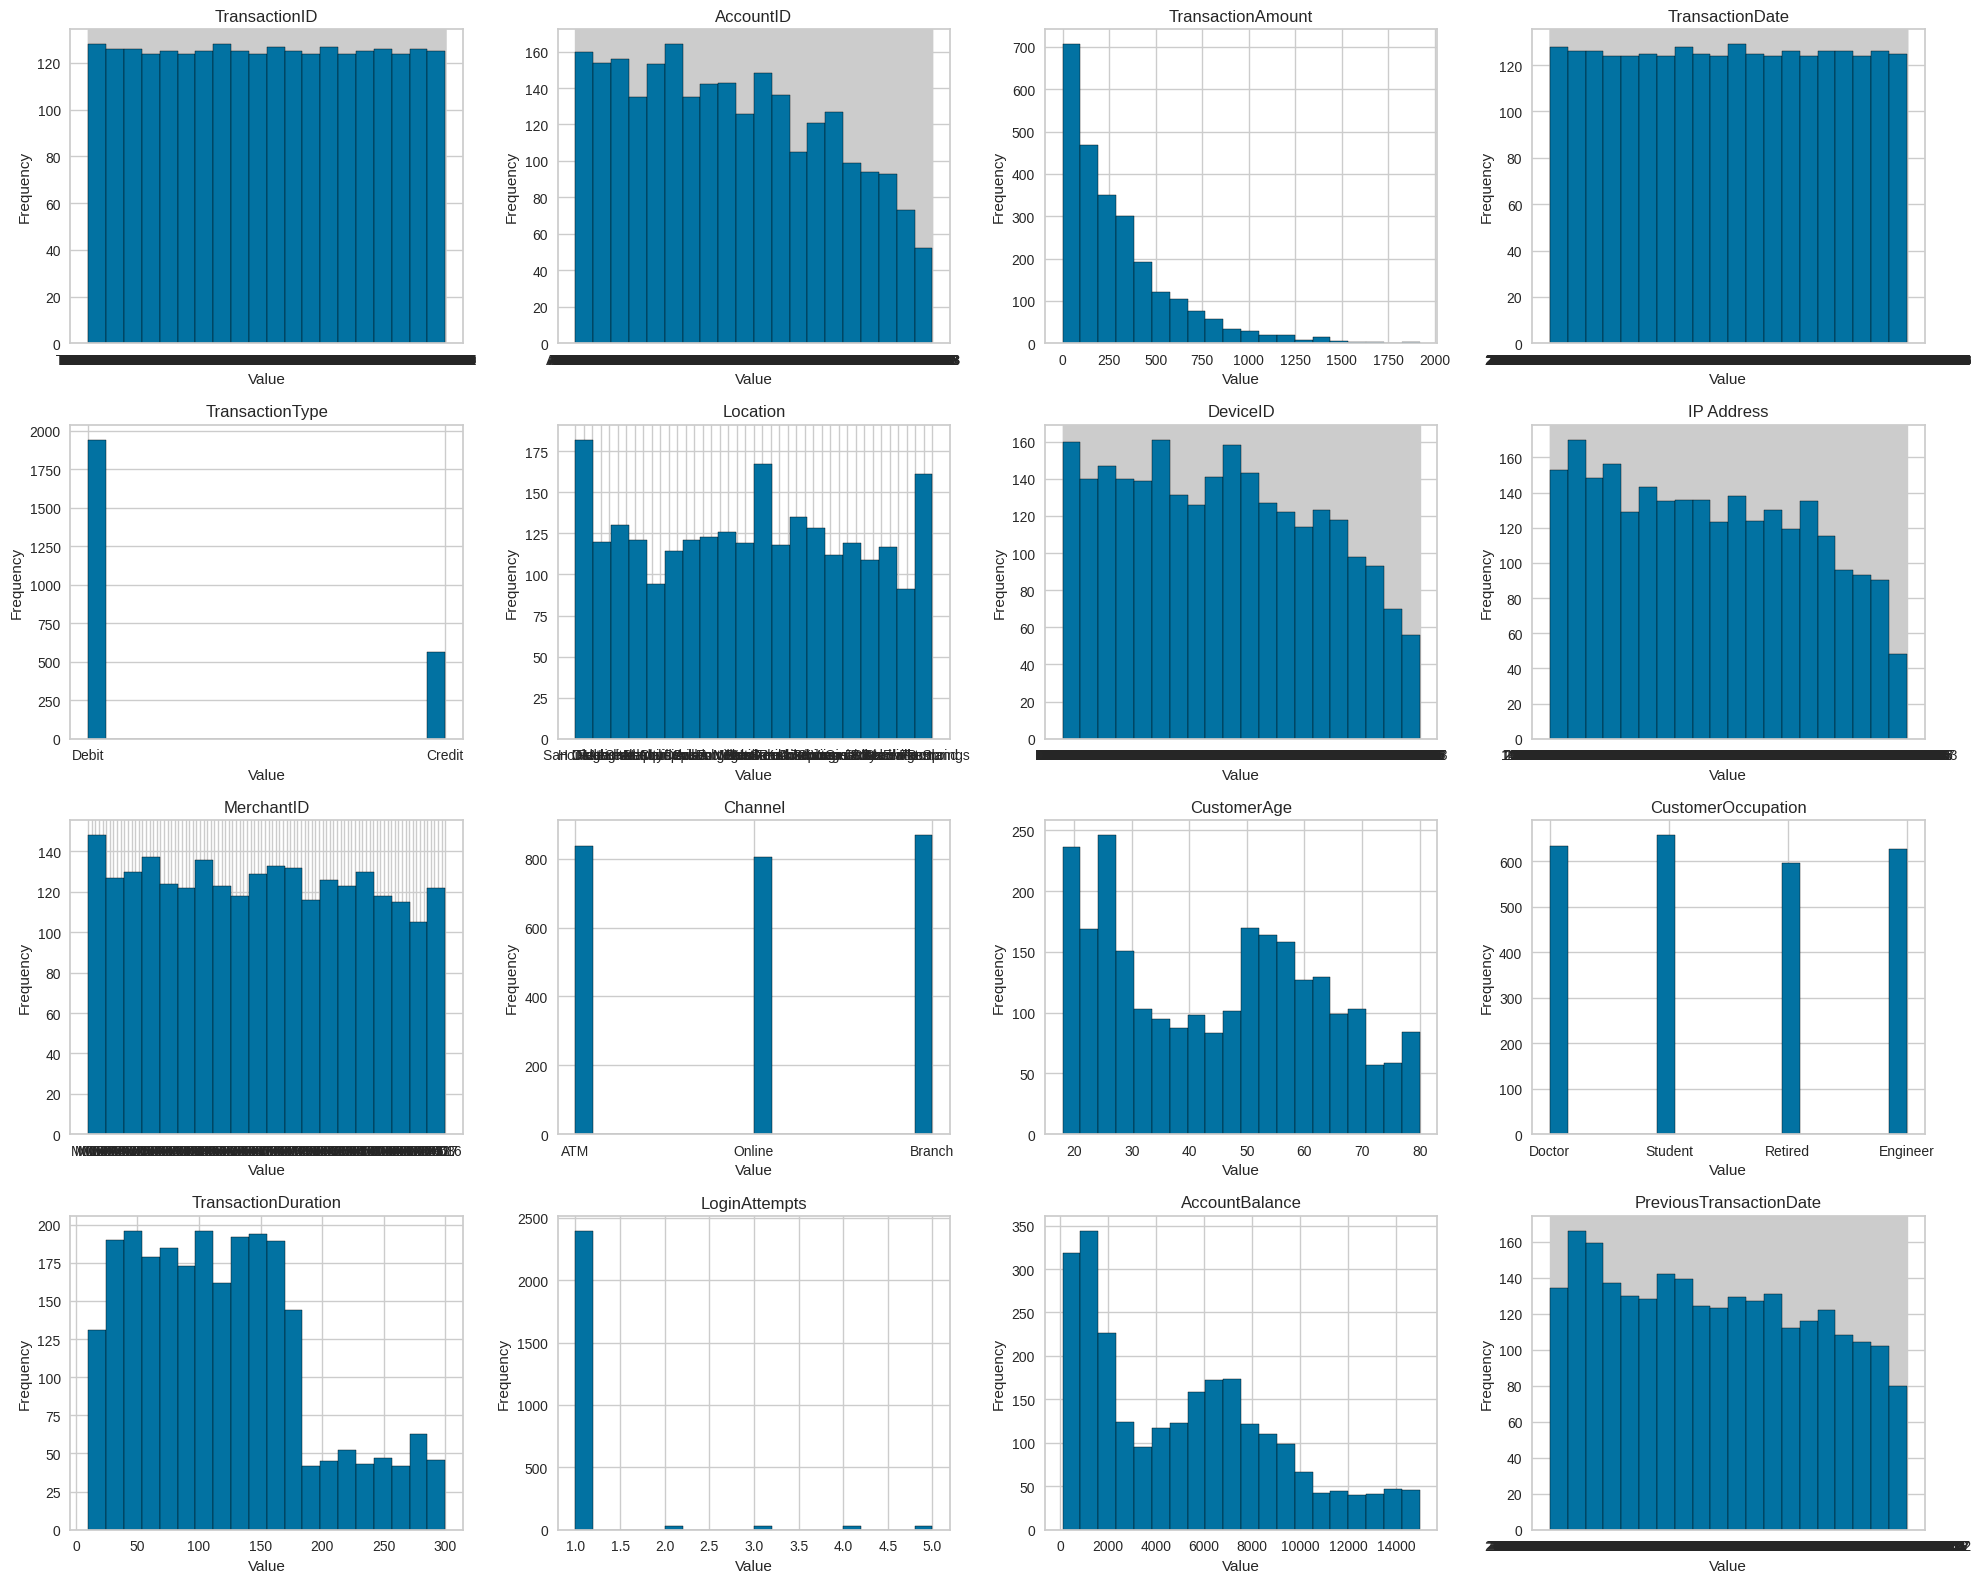

In [9]:
# Menghitung jumlah variabel
num_vars = df.shape[1]

# Menentukan jumlah baris dan kolom untuk grid subplot
n_cols = 4  # Jumlah kolom yang diinginkan
n_rows = -(-num_vars // n_cols)  # Ceiling division untuk menentukan jumlah baris

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array untuk memudahkan iterasi jika diperlukan
axes = axes.flatten()

# Plot setiap variabel
for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Menghapus subplot yang tidak terpakai (jika ada)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()
plt.show()

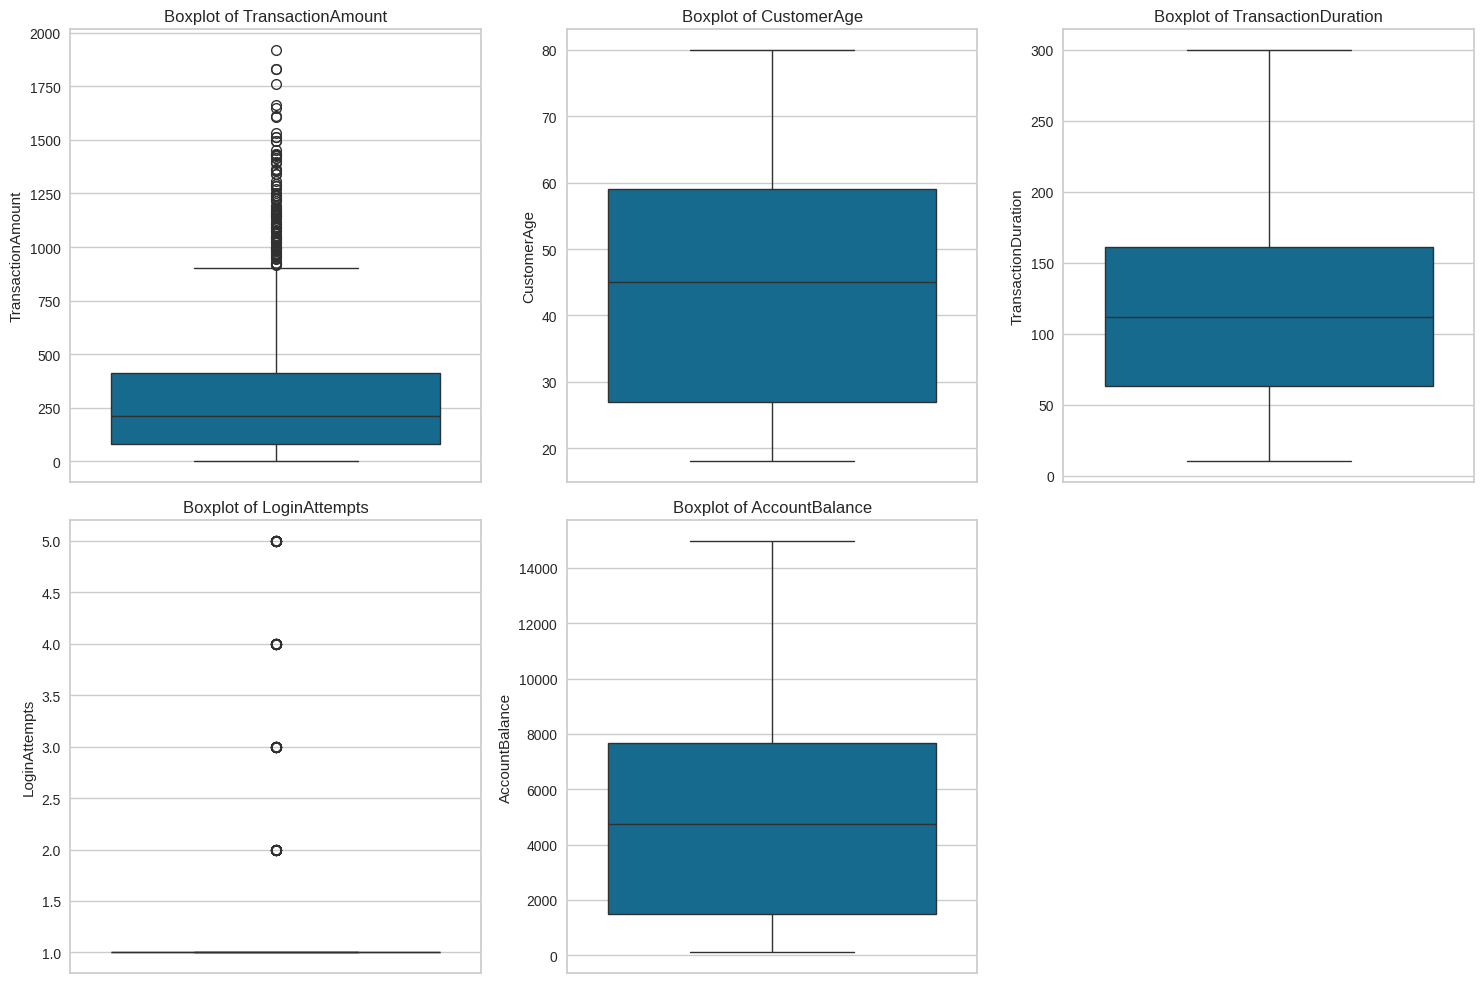

In [10]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
#Outlier Handling
numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [11]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [12]:
df.isnull().sum()/len(df)*100

,0
TransactionID,1.143082
AccountID,0.827749
TransactionAmount,1.024832
TransactionDate,1.103666
TransactionType,1.182499
Location,1.182499
DeviceID,1.182499
IP Address,0.788333
MerchantID,0.906583
Channel,1.064249


In [13]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [14]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
# Identifikasi kolom numerik
numerical_cols = df.select_dtypes(include=['number']).columns

print("Kolom numerik yang akan di-scaling:")
print(numerical_cols)

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Membuat copy dataframe untuk menghindari perubahan pada data asli
df_scaled = df.copy()

# Melakukan scaling hanya pada kolom numerik
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Menampilkan hasil scaling
print("\nDataframe setelah scaling:")
df_scaled.head()

Kolom numerik yang akan di-scaling:
Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')

Dataframe setelah scaling:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [15]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
# Drop kolom yang mengandung ID dan IP Address
columns_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']

df_scaled = df_scaled.drop(columns=columns_to_drop)

# Menampilkan hasil setelah drop
print("\n" + "="*50)
print("Dataframe setelah drop kolom ID dan IP Address:")
print("="*50)
print("\nKolom yang tersisa:")
print(df_scaled.columns.tolist())
print("\nDataframe final:")
df_scaled.head()


Dataframe setelah drop kolom ID dan IP Address:

Kolom yang tersisa:
['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']

Dataframe final:


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [16]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
# Identifikasi kolom kategorikal
categorical_cols = df_scaled.select_dtypes(include=['object']).columns

print("Kolom kategorikal yang akan di-encoding:")
print(categorical_cols.tolist())

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding pada setiap kolom kategorikal
for col in categorical_cols:
    df_scaled[col] = label_encoder.fit_transform(df_scaled[col])
    print(f"\nKolom '{col}' berhasil di-encoding")

# Menampilkan hasil encoding
print("\n" + "="*50)
print("Dataframe setelah encoding:")
print("="*50)
df_scaled.head()

Kolom kategorikal yang akan di-encoding:
['TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']

Kolom 'TransactionDate' berhasil di-encoding

Kolom 'TransactionType' berhasil di-encoding

Kolom 'Location' berhasil di-encoding

Kolom 'Channel' berhasil di-encoding

Kolom 'CustomerOccupation' berhasil di-encoding

Kolom 'PreviousTransactionDate' berhasil di-encoding

Dataframe setelah encoding:


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [17]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df_scaled.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

## Missing Value Handling

In [18]:
df_scaled.isnull().sum()

,0
TransactionAmount,26
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,18
CustomerOccupation,0
TransactionDuration,26
LoginAttempts,21
AccountBalance,27


In [19]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df_scaled = df_scaled.fillna(df_scaled.median())
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2537 non-null   float64
 1   TransactionDate          2537 non-null   int64  
 2   TransactionType          2537 non-null   int64  
 3   Location                 2537 non-null   int64  
 4   Channel                  2537 non-null   int64  
 5   CustomerAge              2537 non-null   float64
 6   CustomerOccupation       2537 non-null   int64  
 7   TransactionDuration      2537 non-null   float64
 8   LoginAttempts            2537 non-null   float64
 9   AccountBalance           2537 non-null   float64
 10  PreviousTransactionDate  2537 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 218.2 KB


In [20]:
df_scaled.shape

(2537, 11)

## Duplicates Handling

In [21]:
df_scaled.duplicated().sum()

np.int64(23)

In [22]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_scaled = df_scaled.drop_duplicates()
df_scaled.duplicated().sum()

np.int64(0)

In [23]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2514 entries, 0 to 2535
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2514 non-null   float64
 1   TransactionDate          2514 non-null   int64  
 2   TransactionType          2514 non-null   int64  
 3   Location                 2514 non-null   int64  
 4   Channel                  2514 non-null   int64  
 5   CustomerAge              2514 non-null   float64
 6   CustomerOccupation       2514 non-null   int64  
 7   TransactionDuration      2514 non-null   float64
 8   LoginAttempts            2514 non-null   float64
 9   AccountBalance           2514 non-null   float64
 10  PreviousTransactionDate  2514 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 235.7 KB


In [24]:
df_scaled.shape

(2514, 11)

## Outlier Handling

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

# Define the function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Fungsi untuk handling outlier menggunakan IQR method dengan Capping/Clipping
def handle_outliers_capping(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping: mengganti nilai outlier dengan batas atas/bawah
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

    return data

# Identifikasi kolom numerik
numerical_cols = df_scaled.select_dtypes(include=['number']).columns

print("HANDLING OUTLIER - METODE CAPPING")
print("="*70)

# Cek outlier sebelum handling
print("\nJumlah outlier SEBELUM handling:")
outlier_before = {}
for col in numerical_cols:
    n_outliers, _, _ = detect_outliers_iqr(df_scaled, col)
    outlier_before[col] = n_outliers
    if n_outliers > 0:
        print(f"  {col}: {n_outliers} outliers")

# Melakukan handling outlier dengan capping untuk semua kolom numerik
for col in numerical_cols:
    df_scaled = handle_outliers_capping(df_scaled, col)

print("Outlier handling selesai!")
print("="*70)

# Cek outlier setelah handling
print("\nJumlah outlier SETELAH handling:")
outlier_after = {}
for col in numerical_cols:
    n_outliers, _, _ = detect_outliers_iqr(df_scaled, col)
    outlier_after[col] = n_outliers
    if n_outliers > 0:
        print(f"  {col}: {n_outliers} outliers")
    else:
        print(f"  {col}: 0 outliers ✓")

# Tampilkan dataframe setelah handling
print("\nDataframe setelah handling outlier:")
df_scaled.head()

HANDLING OUTLIER - METODE CAPPING

Jumlah outlier SEBELUM handling:
  TransactionAmount: 113 outliers
  TransactionType: 593 outliers
  LoginAttempts: 120 outliers
Outlier handling selesai!

Jumlah outlier SETELAH handling:
  TransactionAmount: 0 outliers ✓
  TransactionDate: 0 outliers ✓
  TransactionType: 0 outliers ✓
  Location: 0 outliers ✓
  Channel: 0 outliers ✓
  CustomerAge: 0 outliers ✓
  CustomerOccupation: 0 outliers ✓
  TransactionDuration: 0 outliers ✓
  LoginAttempts: 0 outliers ✓
  AccountBalance: 0 outliers ✓
  PreviousTransactionDate: 0 outliers ✓

Dataframe setelah handling outlier:


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680.0,1.0,36.0,0.0,0.838710,0.0,0.244828,0.0,0.336832,105.0
1,0.195940,1178.0,1.0,15.0,0.0,0.806452,0.0,0.451724,0.0,0.918055,192.0
2,0.065680,1262.0,1.0,23.0,2.0,0.016129,3.0,0.158621,0.0,0.068637,41.0
3,0.096016,818.0,1.0,33.0,2.0,0.129032,3.0,0.051724,0.0,0.569198,163.0
4,0.006874,1939.0,1.0,1.0,2.0,0.435484,3.0,0.648276,0.0,0.492591,16.0


In [26]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# Example: Binning 'CustomerAge' into age groups
# Define age bins and labels
age_bins = [0, 25, 40, 60, 100]
age_labels = ['Young', 'Adult', 'Middle-aged', 'Senior']

# Apply binning to 'CustomerAge'
df_scaled['CustomerAge_Group'] = pd.cut(df_scaled['CustomerAge'], bins=age_bins, labels=age_labels, right=False)

# Encode the binned column
label_encoder = LabelEncoder()
df_scaled['CustomerAge_Group_Encoded'] = label_encoder.fit_transform(df_scaled['CustomerAge_Group'].astype(str)) # Convert to string to handle potential NaN values from binning

# Example: Binning 'TransactionAmount'
# Define transaction amount bins and labels
amount_bins = [0, 100, 500, 1000, df_scaled['TransactionAmount'].max()]
# Ensure bins are strictly increasing and handle potential duplicates
amount_bins = sorted(list(set(amount_bins)))
amount_labels = ['Low', 'Medium', 'High', 'Very High'][:len(amount_bins)-1] # Adjust labels based on actual number of bins

# Apply binning to 'TransactionAmount'
df_scaled['TransactionAmount_Group'] = pd.cut(df_scaled['TransactionAmount'], bins=amount_bins, labels=amount_labels, right=False, include_lowest=True)

# Encode the binned column
df_scaled['TransactionAmount_Group_Encoded'] = label_encoder.fit_transform(df_scaled['TransactionAmount_Group'].astype(str)) # Convert to string to handle potential NaN values from binning

df_scaled.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_Group,CustomerAge_Group_Encoded,TransactionAmount_Group,TransactionAmount_Group_Encoded
0,0.007207,680.0,1.0,36.0,0.0,0.838710,0.0,0.244828,0.0,0.336832,105.0,Young,0,Low,0
1,0.195940,1178.0,1.0,15.0,0.0,0.806452,0.0,0.451724,0.0,0.918055,192.0,Young,0,Low,0
2,0.065680,1262.0,1.0,23.0,2.0,0.016129,3.0,0.158621,0.0,0.068637,41.0,Young,0,Low,0
3,0.096016,818.0,1.0,33.0,2.0,0.129032,3.0,0.051724,0.0,0.569198,163.0,Young,0,Low,0
4,0.006874,1939.0,1.0,1.0,2.0,0.435484,3.0,0.648276,0.0,0.492591,16.0,Young,0,Low,0


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [27]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df_scaled.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_Group_Encoded,TransactionAmount_Group_Encoded
count,2514.000000,2514.000000,2514.0,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2514.0,2514.000000,2514.000000,2514.0,2514.000000
mean,0.147655,1256.328958,1.0,21.284010,1.01074,0.429415,1.530231,0.377490,0.0,0.336864,180.889021,0.0,0.044948
std,0.130069,725.581982,0.0,12.397534,0.83084,0.286157,1.150477,0.240156,0.0,0.260683,103.956287,0.0,0.207232
min,0.000000,0.000000,1.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
25%,0.043213,628.250000,1.0,11.000000,0.00000,0.145161,0.250000,0.182759,0.0,0.095324,91.250000,0.0,0.000000
50%,0.110014,1256.500000,1.0,21.000000,1.00000,0.435484,2.000000,0.351724,0.0,0.311416,181.000000,0.0,0.000000
75%,0.213328,1884.750000,1.0,32.000000,2.00000,0.661290,3.000000,0.520690,0.0,0.506870,272.000000,0.0,0.000000
max,0.468501,2485.000000,1.0,43.000000,3.00000,1.000000,4.000000,1.000000,0.0,1.000000,360.000000,0.0,1.000000


ELBOW METHOD - Menentukan Jumlah Cluster Optimal


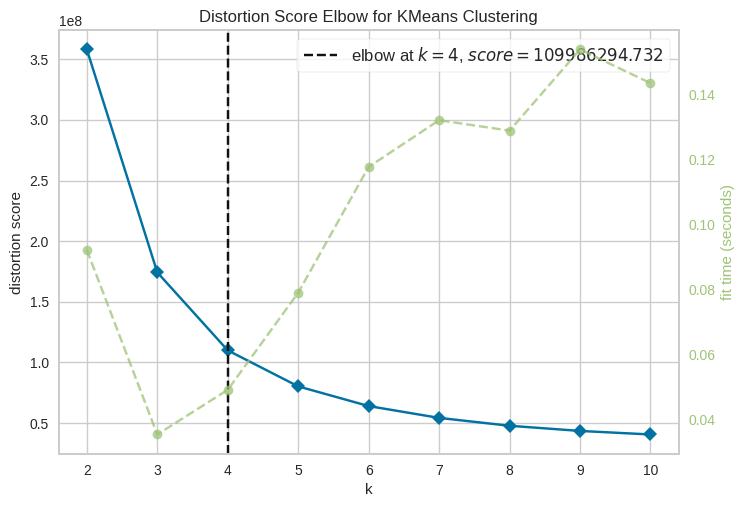


Jumlah cluster optimal: 4
Elbow score: 109986294.7321


In [28]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Inisialisasi model KMeans
model = KMeans(random_state=42, n_init=10) # Added n_init to suppress warning

# Drop the original string columns created during binning
df_scaled_numeric = df_scaled.drop(columns=['CustomerAge_Group', 'TransactionAmount_Group'])

# Visualisasi Elbow Method
visualizer = KElbowVisualizer(model, k=(2, 11))

print("ELBOW METHOD - Menentukan Jumlah Cluster Optimal")

# Fit data ke visualizer
visualizer.fit(df_scaled_numeric)

# Tampilkan plot
visualizer.show()

# Menampilkan nilai k optimal
print(f"\nJumlah cluster optimal: {visualizer.elbow_value_}")
print(f"Elbow score: {visualizer.elbow_score_:.4f}")

In [29]:
# Menggunakan algoritma K-Means Clustering

optimal_k = 4

# Inisialisasi model KMeans dengan k=4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Fit model dan prediksi cluster
# Use the df_scaled_numeric dataframe which does not contain string columns
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled_numeric)

# Informasi hasil clustering
print(f"\nJumlah data per cluster:")
print(df_scaled['Cluster'].value_counts().sort_index())

print(f"\nPersentase data per cluster:")
cluster_percentage = df_scaled['Cluster'].value_counts(normalize=True).sort_index() * 100
for cluster, percentage in cluster_percentage.items():
    print(f"  Cluster {cluster}: {percentage:.2f}%")

print(f"\nInertia (within-cluster sum of squares): {kmeans.inertia_:.4f}")

# Menampilkan centroid setiap cluster

print("Cluster Centers (Centroids)")

# Use the columns from df_scaled_numeric for centroid display
centroids_df = pd.DataFrame(kmeans.cluster_centers_,
                            columns=df_scaled_numeric.columns)
print(centroids_df)

# Tampilkan dataframe dengan label cluster

print("Dataframe Dengan Label Cluster")

df_scaled.head(10)


Jumlah data per cluster:
Cluster
0    625
1    632
2    629
3    628
Name: count, dtype: int64

Persentase data per cluster:
  Cluster 0: 24.86%
  Cluster 1: 25.14%
  Cluster 2: 25.02%
  Cluster 3: 24.98%

Inertia (within-cluster sum of squares): 109986616.3221
Cluster Centers (Centroids)
   TransactionAmount  TransactionDate  TransactionType   Location   Channel  \
0           0.141157        940.50000              1.0  21.262821  1.008013   
1           0.145645       2196.81962              1.0  21.147152  1.056962   
2           0.147300        314.00000              1.0  21.529412  0.974563   
3           0.156477       1567.00000              1.0  21.197138  1.003180   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     0.434502            1.546474             0.377011            0.0   
1     0.430737            1.525316             0.383392            0.0   
2     0.413278            1.480127             0.367069            0.0   
3     0.439176   

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_Group,CustomerAge_Group_Encoded,TransactionAmount_Group,TransactionAmount_Group_Encoded,Cluster
0,0.007207,680.0,1.0,36.0,0.0,0.838710,0.0,0.244828,0.0,0.336832,105.0,Young,0,Low,0,0
1,0.195940,1178.0,1.0,15.0,0.0,0.806452,0.0,0.451724,0.0,0.918055,192.0,Young,0,Low,0,0
2,0.065680,1262.0,1.0,23.0,2.0,0.016129,3.0,0.158621,0.0,0.068637,41.0,Young,0,Low,0,3
3,0.096016,818.0,1.0,33.0,2.0,0.129032,3.0,0.051724,0.0,0.569198,163.0,Young,0,Low,0,0
4,0.006874,1939.0,1.0,1.0,2.0,0.435484,3.0,0.648276,0.0,0.492591,16.0,Young,0,Low,0,1
5,0.047888,635.0,1.0,28.0,0.0,0.000000,3.0,0.558621,0.0,0.045738,13.0,Young,0,Low,0,0
6,0.003554,306.0,1.0,39.0,0.0,0.306452,0.0,0.444828,0.0,0.888330,226.0,Young,0,Low,0,2
7,0.089199,837.0,1.0,16.0,1.0,0.790323,2.0,0.968966,0.0,0.181155,271.0,Young,0,Low,0,0
8,0.055226,557.0,1.0,11.0,1.0,0.532258,1.0,0.262069,0.0,0.604561,290.0,Young,0,Low,0,2
9,0.425098,610.0,1.0,26.0,0.0,0.596774,0.0,0.379310,0.0,0.061884,9.0,Young,0,Low,0,2


Jalankan cell code ini untuk menyimpan model kamu.

In [30]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**


Silhouette Score: 0.4987

Interpretasi Silhouette Score:
  • 0.71 - 1.00 : Struktur cluster SANGAT BAIK
  • 0.51 - 0.70 : Struktur cluster BAIK
  • 0.26 - 0.50 : Struktur cluster CUKUP (weak structure)
  • < 0.25      : Struktur cluster BURUK (no structure)

Kualitas Clustering: CUKUP ✓

SILHOUETTE SCORE PER CLUSTER
Cluster 0: 0.4410 (n=625)
Cluster 1: 0.5571 (n=632)
Cluster 2: 0.5556 (n=629)
Cluster 3: 0.4401 (n=628)


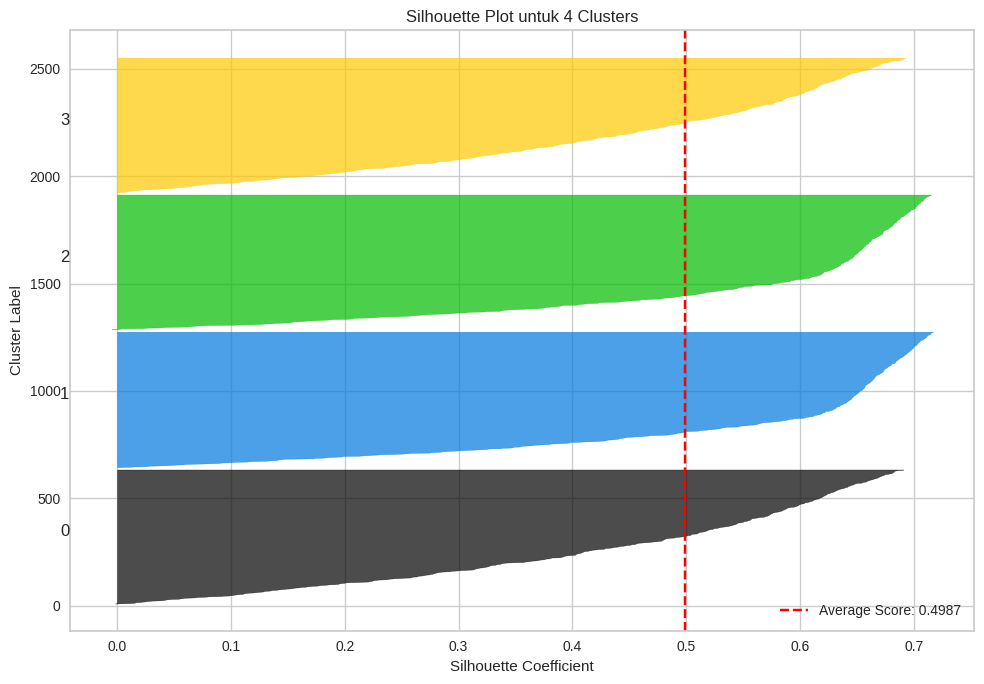

In [31]:
# Menghitung dan menampilkan nilai Silhouette Score.
from sklearn.metrics import silhouette_score, silhouette_samples

# Menghitung Silhouette Score
silhouette_avg = silhouette_score(df_scaled_numeric, df_scaled['Cluster'])

print(f"\nSilhouette Score: {silhouette_avg:.4f}")
print("\nInterpretasi Silhouette Score:")
print("  • 0.71 - 1.00 : Struktur cluster SANGAT BAIK")
print("  • 0.51 - 0.70 : Struktur cluster BAIK")
print("  • 0.26 - 0.50 : Struktur cluster CUKUP (weak structure)")
print("  • < 0.25      : Struktur cluster BURUK (no structure)")

# Interpretasi hasil
if silhouette_avg >= 0.71:
    interpretation = "SANGAT BAIK ✓✓✓"
elif silhouette_avg >= 0.51:
    interpretation = "BAIK ✓✓"
elif silhouette_avg >= 0.26:
    interpretation = "CUKUP ✓"
else:
    interpretation = "BURUK ✗"

print(f"\nKualitas Clustering: {interpretation}")

# Menghitung Silhouette Score per sample
sample_silhouette_values = silhouette_samples(df_scaled_numeric, df_scaled['Cluster'])

# Silhouette score per cluster
print("\n" + "="*70)
print("SILHOUETTE SCORE PER CLUSTER")
print("="*70)
for i in range(optimal_k):
    cluster_silhouette_values = sample_silhouette_values[df_scaled['Cluster'] == i]
    print(f"Cluster {i}: {cluster_silhouette_values.mean():.4f} (n={len(cluster_silhouette_values)})")

# Visualisasi Silhouette Plot
fig, ax = plt.subplots(figsize=(10, 7))
y_lower = 10

for i in range(optimal_k):
    # Aggregate silhouette scores untuk cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[df_scaled['Cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / optimal_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label cluster
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title(f'Silhouette Plot untuk {optimal_k} Clusters')
ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster Label')

# Garis vertikal untuk rata-rata silhouette score
ax.axvline(x=silhouette_avg, color="red", linestyle="--",
           label=f'Average Score: {silhouette_avg:.4f}')
ax.legend()

plt.tight_layout()
plt.show()

In [32]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

In [34]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


ANALISIS DESKRIPTIF PER CLUSTER

Statistik Deskriptif per Cluster:
        TransactionAmount                                          \
                     mean       min       max    median       std   
Cluster                                                             
0                0.141047  0.000599  0.468501  0.103619  0.124923   
1                0.145645  0.000000  0.468501  0.110014  0.130315   
2                0.147300  0.000313  0.468501  0.111265  0.128635   
3                0.156610  0.000031  0.468501  0.110360  0.135956   

        TransactionDate                                      ...  \
                   mean     min     max  median         std  ...   
Cluster                                                      ...   
0             941.00000   629.0  1253.0   941.0  180.566239  ...   
1            2196.81962  1882.0  2485.0  2197.5  181.478334  ...   
2             314.00000     0.0   628.0   314.0  181.720940  ...   
3            1567.50000  1254.0  1881.0  

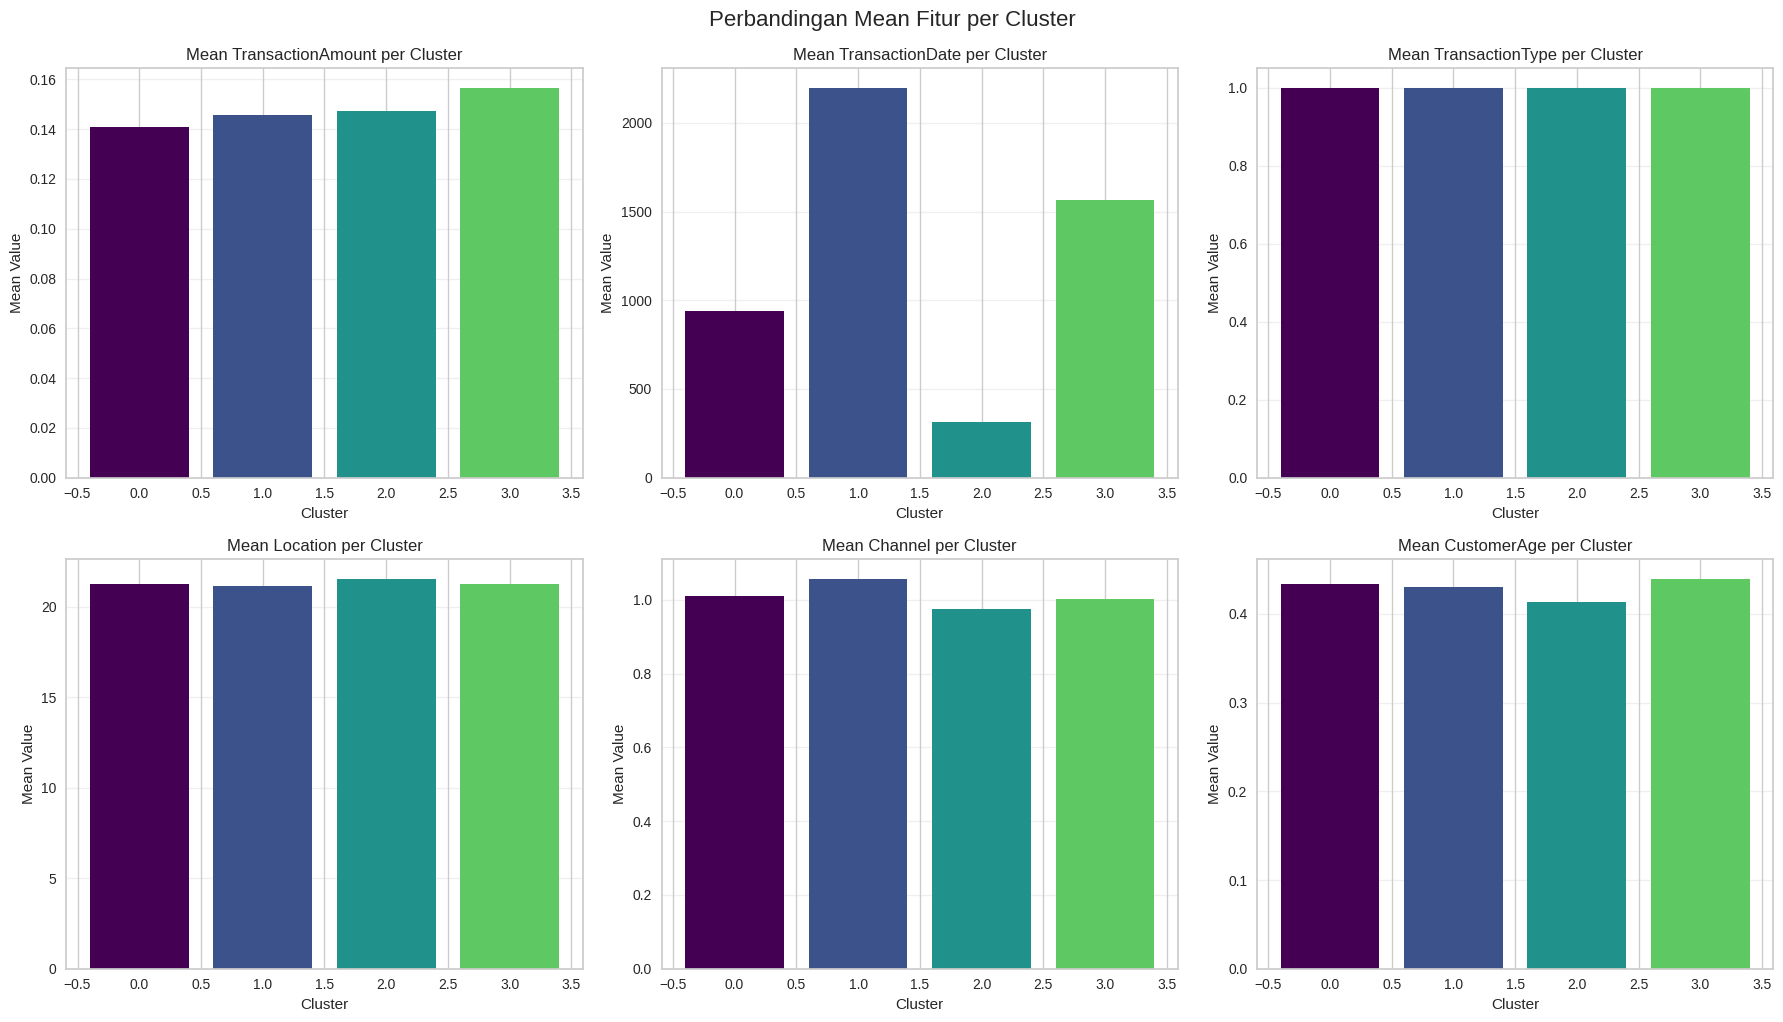

In [35]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

print("ANALISIS DESKRIPTIF PER CLUSTER\n")

# Gunakan df_scaled yang sudah ada kolom Cluster
df_analysis = df_scaled.copy()

# Identifikasi kolom numerik (exclude Cluster)
numeric_cols = df_analysis.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove('Cluster')

# Analisis deskriptif dengan groupby per cluster
print("Statistik Deskriptif per Cluster:")
cluster_analysis = df_analysis.groupby('Cluster')[numeric_cols].agg(['mean', 'min', 'max', 'median', 'std'])
print(cluster_analysis)

# Analisis yang lebih readable per fitur
print("\n\nANALISIS DETAIL PER FITUR NUMERIK\n")

for col in numeric_cols:
    print(f"\nFitur: {col}")

    summary = df_analysis.groupby('Cluster')[col].agg([
        ('Mean', 'mean'),
        ('Median', 'median'),
        ('Min', 'min'),
        ('Max', 'max'),
        ('Std', 'std'),
        ('Count', 'count')
    ])

    print(summary)

# Summary statistik keseluruhan
print("\n\nSUMMARY STATISTIK KESELURUHAN (TANPA GROUPBY)\n")
overall_stats = df_analysis[numeric_cols].agg(['mean', 'min', 'max', 'median', 'std', 'count'])
print(overall_stats)

# Visualisasi perbandingan mean per cluster
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols[:6]):
    cluster_means = df_analysis.groupby('Cluster')[col].mean()

    axes[idx].bar(cluster_means.index, cluster_means.values,
                  color=plt.cm.viridis(cluster_means.index / len(cluster_means)))
    axes[idx].set_title(f'Mean {col} per Cluster')
    axes[idx].set_xlabel('Cluster')
    axes[idx].set_ylabel('Mean Value')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.suptitle('Perbandingan Mean Fitur per Cluster', fontsize=16, y=1.02)
plt.show()

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
**Cluster 0: (Transaksi Periode Tengah)**

Jumlah data: 625 (24.86%)
Rata-rata (mean):

TransactionAmount: 0.141047
TransactionDate: 941.00 (periode tengah)
CustomerAge: 0.434039
AccountBalance: 0.331984
PreviousTransactionDate: 173.82


Analisis: Cluster ini menunjukkan transaksi yang terjadi pada periode tengah (sekitar hari ke-941). Memiliki transaction amount yang relatif rendah dan customer age yang moderat. AccountBalance cukup standar dengan rata-rata previous transaction sekitar 174 hari. Cluster ini merepresentasikan transaksi normal dengan aktivitas reguler pada periode pertengahan.

**Cluster 1: (Transaksi Periode Terbaru)**

Jumlah data: 632 (25.14%)
Rata-rata (mean):

TransactionAmount: 0.145645
TransactionDate: 2196.82 (periode paling baru)
CustomerAge: 0.430737
AccountBalance: 0.343391 (tertinggi)
PreviousTransactionDate: 180.98


Analisis: Cluster ini merupakan transaksi paling baru (periode 2196) dengan TransactionAmount sedikit lebih tinggi dari cluster lain. Memiliki AccountBalance tertinggi (0.343) yang mengindikasikan customer dengan kondisi finansial lebih baik. Previous transaction date sekitar 181 hari menunjukkan customer yang cukup aktif. Cluster ini kemungkinan adalah customer premium atau aktif baru-baru ini.

**Cluster 2: (Transaksi Periode Awal)**

Jumlah data: 629 (25.02%)
Rata-rata (mean):

TransactionAmount: 0.147300 (tertinggi kedua)
TransactionDate: 314.00 (periode paling awal)
CustomerAge: 0.413278 (terendah)
AccountBalance: 0.337153
PreviousTransactionDate: 188.45 (tertinggi)


Analisis: Cluster ini menunjukkan transaksi pada periode paling awal (hari ke-314). Memiliki customer age terendah yang mengindikasikan customer lebih muda. Previous transaction date tertinggi (188 hari) menunjukkan jarak transaksi sebelumnya paling lama. Cluster ini merepresentasikan early adopters atau customer baru yang lebih muda dengan aktivitas transaksi di fase awal sistem.

**Cluster 3: (Transaksi Berisiko Tinggi)**

Jumlah data: 628 (24.98%)
Rata-rata (mean):

TransactionAmount: 0.156610 (TERTINGGI)
TransactionDate: 1567.50 (periode menengah-akhir)
CustomerAge: 0.439645 (tertinggi)
AccountBalance: 0.334862
TransactionAmount_Group_Encoded: 0.058917 (tertinggi - ada 5.9% transaksi amount tinggi)


Analisis: Cluster ini memiliki TransactionAmount tertinggi (0.157) dan customer age tertinggi (0.44), mengindikasikan customer lebih senior dengan nilai transaksi besar. Persentase transaksi dengan amount tinggi (encoded) paling besar (5.9%). Cluster ini berpotensi merepresentasikan customer dengan purchasing power tinggi atau perlu monitoring khusus untuk deteksi fraud karena nilai transaksi yang signifikan lebih tinggi dari cluster lainnya.

Insight Utama:

Semua cluster memiliki LoginAttempts = 0 (tidak ada indikasi brute force attack)
TransactionType = 1.0 untuk semua cluster (hanya 1 tipe transaksi)
Cluster 3 perlu perhatian khusus karena TransactionAmount tertinggi
Distribusi data cukup seimbang (~25% per cluster)

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [43]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
# Mengubah nama kolom 'Cluster' menjadi 'Target'
df_scaled = df_scaled.rename(columns={'Cluster': 'Target'})

print("Nama kolom berhasil diubah dari 'Cluster' menjadi 'Target'")
print("\nKolom yang ada sekarang:")
print(df_scaled.columns.tolist())

print("\nJumlah data per Target:")
print(df_scaled['Target'].value_counts().sort_index())

# Tampilkan dataframe
print("\nDataframe dengan kolom 'Target':")
df_scaled.head()

Nama kolom berhasil diubah dari 'Cluster' menjadi 'Target'

Kolom yang ada sekarang:
['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate', 'CustomerAge_Group', 'CustomerAge_Group_Encoded', 'TransactionAmount_Group', 'TransactionAmount_Group_Encoded', 'Target']

Jumlah data per Target:
Target
0    625
1    632
2    629
3    628
Name: count, dtype: int64

Dataframe dengan kolom 'Target':


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_Group,CustomerAge_Group_Encoded,TransactionAmount_Group,TransactionAmount_Group_Encoded,Target
0,0.007207,680.0,1.0,36.0,0.0,0.838710,0.0,0.244828,0.0,0.336832,105.0,Young,0,Low,0,0
1,0.195940,1178.0,1.0,15.0,0.0,0.806452,0.0,0.451724,0.0,0.918055,192.0,Young,0,Low,0,0
2,0.065680,1262.0,1.0,23.0,2.0,0.016129,3.0,0.158621,0.0,0.068637,41.0,Young,0,Low,0,3
3,0.096016,818.0,1.0,33.0,2.0,0.129032,3.0,0.051724,0.0,0.569198,163.0,Young,0,Low,0,0
4,0.006874,1939.0,1.0,1.0,2.0,0.435484,3.0,0.648276,0.0,0.492591,16.0,Young,0,Low,0,1


In [44]:
# Simpan Data
df_scaled.to_csv('data_clustering.csv', index=False)

In [45]:
from google.colab import files
files.download('data_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
df_scaled.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_Group,CustomerAge_Group_Encoded,TransactionAmount_Group,TransactionAmount_Group_Encoded,Target
0,0.007207,680.0,1.0,36.0,0.0,0.838710,0.0,0.244828,0.0,0.336832,105.0,Young,0,Low,0,0
1,0.195940,1178.0,1.0,15.0,0.0,0.806452,0.0,0.451724,0.0,0.918055,192.0,Young,0,Low,0,0
2,0.065680,1262.0,1.0,23.0,2.0,0.016129,3.0,0.158621,0.0,0.068637,41.0,Young,0,Low,0,3
3,0.096016,818.0,1.0,33.0,2.0,0.129032,3.0,0.051724,0.0,0.569198,163.0,Young,0,Low,0,0
4,0.006874,1939.0,1.0,1.0,2.0,0.435484,3.0,0.648276,0.0,0.492591,16.0,Young,0,Low,0,1


In [47]:
url='https://raw.githubusercontent.com/amrrmadhn/bmlp-dicoding/refs/heads/master/Clustering/data_clustering.csv'
df_exported = pd.read_csv(url)
df_exported.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_Group,CustomerAge_Group_Encoded,TransactionAmount_Group,TransactionAmount_Group_Encoded,Target
0,0.007207,680.0,1.0,36.0,0.0,0.838710,0.0,0.244828,0.0,0.336832,105.0,Young,0,Low,0,0
1,0.195940,1178.0,1.0,15.0,0.0,0.806452,0.0,0.451724,0.0,0.918055,192.0,Young,0,Low,0,0
2,0.065680,1262.0,1.0,23.0,2.0,0.016129,3.0,0.158621,0.0,0.068637,41.0,Young,0,Low,0,3
3,0.096016,818.0,1.0,33.0,2.0,0.129032,3.0,0.051724,0.0,0.569198,163.0,Young,0,Low,0,0
4,0.006874,1939.0,1.0,1.0,2.0,0.435484,3.0,0.648276,0.0,0.492591,16.0,Young,0,Low,0,1


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [38]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [39]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [40]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [41]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [42]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

End of Code.